In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 300)
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import clear_output
clear_output(wait=True)

import gc
gc.collect()

0

In [2]:
!pip install fuzzywuzzy


Defaulting to user installation because normal site-packages is not writeable


In [50]:
anime= pd.read_csv("anime_details - Copy.csv",dtype={'title':object,'Rank':'int','Popularity':'int32','score':'float',
                                                             'summary':'object','Studio':'object','Episode':'int',
                                                             'Producer':'object','Licensor':'object','Genre':'object',
                                                              'Theme':'object','Duration':'int','imgsrc':'object'   })
anime.drop(columns=['ID','link','code','members','Unnamed: 17','Unnamed: 18'],inplace=True)
anime.reset_index(drop=False, inplace=True)

In [3]:
anime.dtypes

index           int64
title          object
rank          float64
popularity    float64
score         float64
summary        object
studio         object
episode       float64
producer       object
licensor       object
genre          object
theme          object
duration      float64
dtype: object

In [4]:
len(anime['score'])

25077

In [11]:
anime['title'].nunique()

25027

In [26]:
anime['score'].mean()

6.3951913446676985

In [51]:
anime['genre']=anime['genre'].apply(lambda a:str(a).translate(str.maketrans({'{': '', '}': '','\'':''," ":'','[':'',']':''})).split(','))
anime['studio']=anime['studio'].apply(lambda a:str(a).translate(str.maketrans({'{': '', '}': '','\'':''," ":''})).split(','))
anime['producer']=anime['producer'].apply(lambda a:str(a).translate(str.maketrans({'{': '', '}': '','\'':''," ":''})).split(','))
anime['licensor']=anime['licensor'].apply(lambda a:str(a).translate(str.maketrans({'{': '', '}': '','\'':''," ":''})).split(','))
anime['theme']=anime['theme'].apply(lambda a:str(a).translate(str.maketrans({'{': '', '}': '','\'':''," ":'','[':'',']':''})).split(','))
anime['summary']=anime['summary'].apply(lambda a:str(a).translate(str.maketrans({'{': '', '}': '','\'':'','[':'',']':''})))


In [81]:
from collections import Counter

genre_count=Counter(g for genres in anime['genre'] for g in genres)
print(len(genre_count))
genre_count

27


Counter({'nan': 14036,
         'Comedy': 4741,
         'Action': 4311,
         'Fantasy': 4093,
         'Adventure': 3476,
         'Sci-Fi': 2738,
         'Drama': 2176,
         'Romance': 1781,
         'Supernatural': 1326,
         'of': 950,
         'Slice': 950,
         'Life': 950,
         'Mystery': 797,
         'Ecchi': 723,
         'Horror': 467,
         'Sports': 362,
         'Hentai': 303,
         'Love': 245,
         'Suspense': 231,
         'Winning': 223,
         'Award': 223,
         'Garde': 199,
         'Avant': 199,
         'Boys': 150,
         'Gourmet': 129,
         'Girls': 96,
         'Erotica': 62})

In [54]:
genre_count.most_common(5)


[('nan', 14036),
 ('Comedy', 4741),
 ('Action', 4311),
 ('Fantasy', 4093),
 ('Adventure', 3476)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'nan'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Fantasy'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Sci-Fi'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Supernatural'),
  Text(9, 0, 'Life'),
  Text(10, 0, 'of'),
  Text(11, 0, 'Slice'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Ecchi'),
  Text(14, 0, 'Horror'),
  Text(15, 0, 'Sports'),
  Text(16, 0, 'Hentai'),
  Text(17, 0, 'Love'),
  Text(18, 0, 'Suspense'),
  Text(19, 0, 'Award'),
  Text(20, 0, 'Winning'),
  Text(21, 0, 'Garde'),
  Text(22, 0, 'Avant'),
  Text(23, 0, 'Boys'),
  Text(24, 0, 'Gourmet'),
  Text(25, 0, 'Girls'),
  Text(26, 0, 'Erotica')])

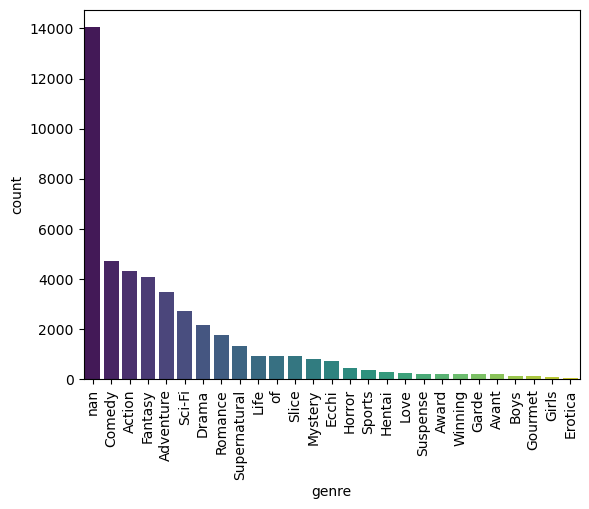

In [58]:
genre_count_df=pd.DataFrame([genre_count]).T.reset_index()
genre_count_df.columns=['genre','count']

sns.barplot(x='genre',y='count',data=genre_count_df.sort_values(by='count',ascending=False),palette='viridis')
plt.xticks(rotation=90)

In [4]:
sample=anime.select_dtypes(include='number').drop(columns=["index","score","rank"])

anime['combined']=anime['theme']+anime['licensor']+anime['genre']

combined=set(c for combine in anime['combined'] for c in combine)
for a in combined:
    anime[a]=anime.combined.transform(lambda x: int(a in x))
    


C:\Users\Hawk-Eye Mi-Hawk\AppData\Local\Temp\ipykernel_18932\3402763576.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anime[a]=anime.combined.transform(lambda x: int(a in x))
C:\Users\Hawk-Eye Mi-Hawk\AppData\Local\Temp\ipykernel_18932\3402763576.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anime[a]=anime.combined.transform(lambda x: int(a in x))
C:\Users\Hawk-Eye Mi-Hawk\AppData\Local\Temp\ipykernel_18932\3402763576.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [5]:
sample=anime.select_dtypes(include='number')


In [49]:
sample.describe()

,index,rank,popularity,score,episode,duration
count,25077.000000,20254.000000,25075.000000,16175.000000,24549.000000,24478.000000
mean,12538.000000,10320.681149,12770.096670,6.395191,14.743859,24.834341
std,7239.250686,5975.165021,7375.139349,0.910027,48.051342,33.215531
min,0.000000,1.000000,1.000000,1.850000,1.000000,1.000000
25%,6269.000000,5135.250000,6385.500000,5.760000,1.000000,5.000000
50%,12538.000000,10312.500000,12757.000000,6.390000,2.000000,17.000000
75%,18807.000000,15499.750000,19154.000000,7.060000,13.000000,25.000000
max,25076.000000,20633.000000,25540.000000,9.100000,3057.000000,248.000000


In [51]:
sample.isnull().sum() * 100 / len(sample)

index          0.000000
rank          19.232763
popularity     0.007975
score         35.498664
episode        2.105515
duration       2.388643
dtype: float64

In [5]:
change_popularity=list(range(0,int(max(anime['popularity'])),150))

def Change_Popularity(x):

    for i in range(0,len(change_popularity)-1):
        if x >= change_popularity[-1]:
            return "great popularity"
        elif x >= change_popularity[i] and x <= change_popularity[i+1]:
            return str(change_popularity[i])+"-"+str(change_popularity[i+1])
        

def Change_duration(x):
    if x >= 1 and x<=5:
        return "1-5"
    if x >= 6 and x<=10:
        return "6-10"
    if x >= 11 and x<=15:
        return "11-15"
    if x >= 16 and x<=20:
        return "16-20"
    if x >= 21 and x<=25:
        return "21-25"
    if x >= 26 and x<=35:
        return "26-35"
    if x >= 35:
        return "35+"
    

def Change_episode(x):
    if x == 1:
        return "1"
    if x == 2:
        return "2"
    if x == 3 or x==4:
        return "3-4"
    if x >= 5 and x<=9:
        return "5-9"
    if x >= 10 and x<=14:
        return "10-14"
    if x >= 15 and x<=20:
        return "15-20"
    if x >= 21 and x <= 26:
        return "21-26"
    if x >= 27 and x <= 30:
        return "27-30"
    if x >= 31 and x <= 49:
        return "31-49"
    if x >= 50 and x <= 52:
        return "50-52"
    if x >= 53:
        return "53"
    
    
def Change_Score(x):
    if x <= 5.0:
        return '5'
    if x > 5.0 and x < 6.0:
        return '5-6'
    if x >=6.0 and x < 7.0:
        return '6-7'
    if x >= 7.0 and x < 8.0:
        return '7-8'
    if x >= 8.0:
        return '8'

<Axes: xlabel='count', ylabel='episode'>

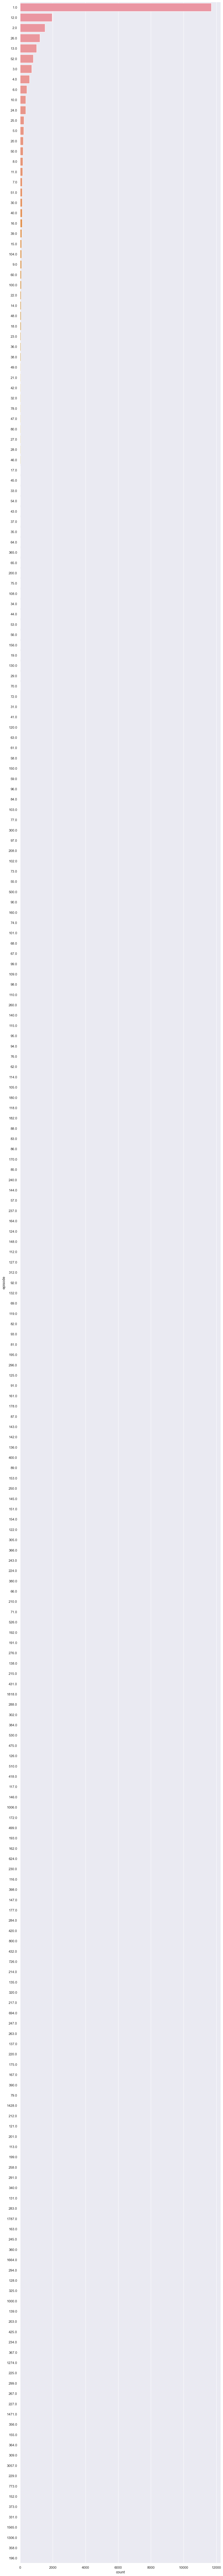

In [224]:
sns.set_theme(rc={'figure.figsize':(11.7,150)})

sns.countplot(data=anime, y='episode', order=anime.episode.value_counts().index)


In [6]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=20,weights='uniform',metric='nan_euclidean')
filled_data=imputer.fit_transform(sample)
filled_data=pd.DataFrame(filled_data,columns=sample.columns)
filled_data=filled_data.reset_index()

anime['popularity']=filled_data['popularity']
anime['episode']=filled_data['episode']
anime['duration']=filled_data['duration']



In [7]:
anime["popularity_ch"]=anime['popularity'].apply(lambda x: Change_Popularity(int(x)))
anime["duration_ch"]=anime['duration'].apply(lambda x: Change_duration(int(x)))
anime["episode_ch"]=anime['episode'].apply(lambda x: Change_episode(int(x)))
anime["score_ch"]=anime['score'].apply(lambda x:Change_Score(x))

C:\Users\Hawk-Eye Mi-Hawk\AppData\Local\Temp\ipykernel_18932\181340793.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anime["popularity_ch"]=anime['popularity'].apply(lambda x: Change_Popularity(int(x)))
C:\Users\Hawk-Eye Mi-Hawk\AppData\Local\Temp\ipykernel_18932\181340793.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anime["duration_ch"]=anime['duration'].apply(lambda x: Change_duration(int(x)))
C:\Users\Hawk-Eye Mi-Hawk\AppData\Local\Temp\ipykernel_18932\181340793.py:3: PerformanceWarning: DataFrame is highly fragm

In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns=['popularity_ch','duration_ch','episode_ch','score_ch']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(anime[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


In [9]:
drop=['imgsrc','score_ch','popularity_ch','episode_ch','duration_ch','title','rank','popularity','score','summary','episode','duration','studio','producer','licensor','genre','theme','combined','nan']
anime_summary=anime.drop(columns=drop)

In [59]:
matrix=pd.concat([anime_summary, one_hot_df], axis=1).drop(columns=['index','score_ch_None'])


In [12]:
matrix

,Time,Gourmet,Romance,ANEntertainment,Sex,SentaiFilmworks,Arts,NYAVPost,NISAmerica,IllumitoonEntertainment,...,episode_ch_3-4,episode_ch_31-49,episode_ch_5-9,episode_ch_50-52,episode_ch_53,score_ch_5,score_ch_5-6,score_ch_6-7,score_ch_7-8,score_ch_8
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25073,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25074,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25075,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


(25077, 25077)

array([1.        , 0.25197632, 0.11952286, ..., 0.3380617 , 0.        ,
       0.56694671])

In [14]:
from fuzzywuzzy import process

def anime_finder(name):
    all_titles=anime['title'].tolist()
    match=process.extractOne(name,all_titles)
    return match[0]

C:\Users\Hawk-Eye Mi-Hawk\AppData\Roaming\Python\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [15]:
title=anime_finder('Oregairu')
title

'Ai'

In [11]:
name='91 Days'
movie_index=dict(zip(anime['title'],list(anime.index)))
index=movie_index[name]
index

199

In [12]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=40,n_iter=20)
q = svd.fit_transform(matrix)

q.shape

(25077, 40)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim=cosine_similarity(q,q)
cosine_sim.shape

(25077, 25077)

In [61]:
def recommend(name):
    index=movie_index[name]
    n_recommendations=300
    sim_scores=list(enumerate(b[index]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:(n_recommendations+1)]

    recommended_anime=[i[0] for i in sim_scores]

    list1=set(anime.iloc[index]['theme'])

    recommendation=[]

    list1=set(anime.iloc[index]['theme'])
    list1.discard('nan')
    print(list1)
    if list1:
        for j in sim_scores:
            list2=set(anime.iloc[j[0]]['theme'])
            list2.discard('nan')
            if list2:
                common = set(list1).intersection(set(list2))
                if (len(common)==len(list2)) and common:
                    recommendation.append(j[0])

    else :
        list1=set(anime.iloc[index]['genre'])
        list1.discard('nan')

        for j in sim_scores:
            list2=set(anime.iloc[j[0]]['genre'])
            list2.discard('nan')
            if list2:
                common= set(list1).intersection(set(list2))
                if (len(common)==len(list2)) and common:
                    recommendation.append(j[0])
                    
    print(anime['title'].iloc[recommendation][:15])

In [62]:
recommend('91 Days')

set()
5775                                              Gangsta.
18814                                             Shigurui
859                             Angolmois: Genkou Kassenki
15527                                               Onihei
7119                                 Hataraku Saibou Black
22707                                        ViVid Strike!
8554                                Initial D Second Stage
10292                            Kochouki: Wakaki Nobunaga
19025                               Shingeki no Kyojin OVA
19032                      Shingeki no Kyojin: Ano Hi Kara
7779                Hokuto no Ken: Raoh Gaiden Ten no Haoh
19035                       Shingeki no Kyojin: Lost Girls
21619                                        Tokyo Tribe 2
14241    Naikaku Kenryoku Hanzai Kyousei Torishimarikan...
1908                                         Black Jack 21
Name: title, dtype: object


In [52]:
dump=anime[['index','title','theme','genre','imgsrc']]

In [53]:
dump

,index,title,theme,genre,imgsrc
0,0,......,[Music],"[Horror, Supernatural]",https://cdn.myanimelist.net/images/anime/1057/...
1,1,.hack//G.U. Returner,"[Video, Game]","[Drama, Adventure, Fantasy]",https://cdn.myanimelist.net/images/anime/1798/...
2,2,.hack//G.U. Trilogy,"[Video, Game]","[Fantasy, Action]",https://cdn.myanimelist.net/images/anime/4/230...
3,3,.hack//G.U. Trilogy: Parody Mode,[nan],"[Fantasy, Comedy, Sci-Fi]",https://cdn.myanimelist.net/images/anime/10/86...
4,4,.hack//Gift,"[Video, Game]","[Fantasy, Comedy]",https://cdn.myanimelist.net/images/anime/2/230...
...,...,...,...,...,...
25072,25072,Zurui Maboroshi,[Music],[nan],https://cdn.myanimelist.net/images/anime/1096/...
25073,25073,Zutto Mae kara Suki deshita. Kokuhaku Jikkou I...,[School],[nan],https://cdn.myanimelist.net/images/anime/3/821...
25074,25074,Zutto Mae kara Suki deshita. Kokuhaku Jikkou I...,[School],[nan],https://cdn.myanimelist.net/images/anime/6/883...
25075,25075,Zutto Suki Datta,[School],"[Hentai, Drama]",https://cdn.myanimelist.net/images/anime/1498/...


In [ ]:
b = np.float16(cosine_sim)


In [48]:
import pickle

In [55]:
pickle.dump(dump,open('anime.pkl','wb'))

In [42]:
pickle.dump(b,open('ssimilarity.pkl','wb'))